# Trump/Clinton Tweets During the 2016 Election

In this notebook you will explore over 6000 Tweets from Donald Trump and Hillary Clinton during the 2016 US presidential election. This dataset comes from Kaggle:

https://www.kaggle.com/benhamner/clinton-trump-tweets

## Imports

In [1]:
import numpy as np
import pandas as pd
import altair as alt
alt.enable_mime_rendering()

## Introduction to spaCy

The [spaCy]() package is a modern, high-performance natural language processing (NLP) library for Python. Let's look at how spaCy can be used for basic NLP tasks, such as tokenization. First import spaCy and load its english lanuage data:

In [2]:
import spacy

In [3]:
nlp = spacy.load('en')

The `nlp` object is a function that provides the main API for working with text. Call it with the text as the argument:

In [4]:
doc = nlp(u'Hello, world.\n Here are two sentences.')

In [5]:
type(doc)

spacy.tokens.doc.Doc

The resulting `Doc` object has a rich API for working with the text. You can iterate over the tokens in the document:

In [6]:
for token in doc:
    print('Token: {}'.format(repr(token.text)))

Token: 'Hello'
Token: ','
Token: 'world'
Token: '.'
Token: '\n '
Token: 'Here'
Token: 'are'
Token: 'two'
Token: 'sentences'
Token: '.'


The tokens themselves are rich objects. Let's grab the first token from this text and look at it further:

In [7]:
token = doc[0]

The `is_punct` attribute tells if the token is punctuation:

In [8]:
token.is_punct

False

The `is_stop` attribute tells if the token is a stop (common) word:

In [9]:
token.is_stop

False

The `is_space` attribute tells if the token is a space (`' '`,`\n`,`\t`):

In [10]:
token.is_space

False

Get the string representation of the token as follows:

In [11]:
str(token)

'Hello'

## Tokenization, stop words, punctuation

Write a function, `yield_words`, that uses spaCy to tokenize a string of text, yielding the resulting words. Your function should remove punctuation, stop words and any URLs using spaCy's token attributes:

In [12]:
def yield_words(text):
    """Yield all words in text other than stop words, punctuation or URLs."""
    doc = nlp(text)
    for token in doc:
        if (not token.is_space) and (not token.is_stop) and (not token.is_punct) and ("http" not in token.string):
            yield str(token).lower()

In [13]:
assert list(yield_words(u'Hello, world.\n Here are two https://google.com sentences.'))==\
       ['hello', 'world', 'here', 'sentences']

## Counting words

Now that we can generate a list of words, let's count the number of times each word appears. Write a Python function that takes an iterator over words and returns a `dict` of word counts. The keys in the `dicts` should be the words and the values should be the counts. Your function should optionally take a `counts` keyword argument that will let you pass in an existing word count `dict` to which additional counts can be appended.

In [14]:
def count_words(words, counts=None):
    """Return a dictionary with the word counts for the input iterator of words.
    
    If `counts` is None, create and return a new count `dict`.
    If `counts` is a `dict` append new counts to it.
    """
    # YOUR CODE HERE
    if counts is None:
        counts = dict()
    
    for word in words:
        word = word.strip()
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
    
    return counts

In [15]:
text = """
On another day of chaotic developments over the week-old order,
the State Department reversed its cancellation of visas for people 
from the affected countries, small numbers of travelers began venturing 
to airports to try to fly to the United States, and Mr. Trump mounted 
a harsh personal attack on the judge.
In an early-morning Twitter post from his waterfront Florida resort, 
where he is spending the first getaway weekend of his presidency, 
Mr. Trump wrote, “The opinion of this so-called judge, which essentially 
takes law-enforcement away from our country, is ridiculous and will be 
overturned!”
"""
counts = count_words(yield_words(text))
assert counts == {'affected': 1, 'airports': 1, 'attack': 1, 'away': 1, 'began': 1,
                  'called': 1, 'cancellation': 1, 'chaotic': 1, 'countries': 1,
                  'country': 1, 'day': 1, 'department': 1, 'developments': 1,
                  'early': 1, 'enforcement': 1, 'essentially': 1, 'florida': 1,
                  'fly': 1, 'getaway': 1, 'harsh': 1, 'in': 1, 'judge': 2, 'law': 1,
                  'morning': 1, 'mounted': 1, 'mr.': 2, 'numbers': 1, 'old': 1, 'on': 1,
                  'opinion': 1, 'order': 1, 'overturned': 1, 'people': 1, 'personal': 1,
                  'post': 1, 'presidency': 1, 'resort': 1, 'reversed': 1, 'ridiculous': 1,
                  'small': 1, 'spending': 1, 'state': 1, 'states': 1, 'takes': 1, 'the': 1,
                  'travelers': 1, 'trump': 2, 'try': 1, 'twitter': 1, 'united': 1, 
                  'venturing': 1, 'visas': 1, 'waterfront': 1, 'week': 1, 'weekend': 1,
                  'wrote': 1}

In [16]:
counts1 = {}
for i in range(10):
    count_words(['the'], counts1)
assert counts1['the']==10

## Trump and Clinton Tweets

Now let's explore the Trump and Clinton tweets. First, load it as a `DataFrame`:

In [17]:
data = pd.read_csv('/data/clinton-trump-tweets/tweets.csv')

In [18]:
data.head()

,id,handle,text,is_retweet,original_author,time,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,is_quote_status,...,place_type,place_country_code,place_country,place_contained_within,place_attributes,place_bounding_box,source_url,truncated,entities,extended_entities
0,780925634159796224,HillaryClinton,The question in this election: Who can put the...,False,NaN,2016-09-28T00:22:34,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Xr...,{'media': [{'display_url': 'pic.twitter.com/Xr...
1,780916180899037184,HillaryClinton,"Last night, Donald Trump said not paying taxes...",True,timkaine,2016-09-27T23:45:00,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/t0...,{'media': [{'display_url': 'pic.twitter.com/t0...
2,780911564857761793,HillaryClinton,Couldn't be more proud of @HillaryClinton. Her...,True,POTUS,2016-09-27T23:26:40,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [{'id_str': '1536791610', 'n...",NaN
3,780907038650068994,HillaryClinton,"If we stand together, there's nothing we can't...",False,NaN,2016-09-27T23:08:41,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Q3...,{'media': [{'display_url': 'pic.twitter.com/Q3...
4,780897419462602752,HillaryClinton,Both candidates were asked about how they'd co...,False,NaN,2016-09-27T22:30:27,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [], 'symbols': [], 'urls': [...",NaN


In [19]:
len(data)

6444

Create a new `DataFrame` named `subset`:

* Call the `.sample()` method to extract `1000` random rows from the dataset. For larger datasets, it is often important to begin looking at subsets of the data for performance reasons.
* Call the `.reset_index()` method to reset the row index to ordered integers.
* Extract the following columns (`handle`, `text`, `time`, `retweet_count`, `favorite_count`).

In [20]:
# YOUR CODE HERE
subset=pd.DataFrame(data.sample(n=1000)).reset_index()
subset = subset.loc[:, ['handle', 'text', 'time', 'retweet_count', 'favorite_count']]

In [21]:
subset.head()

,handle,text,time,retweet_count,favorite_count
0,realDonaldTrump,"""@oasisupernova: @realDonaldTrump UP TO 8.4 MI...",2016-05-25T05:42:49,2684,9643
1,HillaryClinton,"""People ask me all the time: How does she do i...",2016-07-29T02:13:01,1399,4790
2,realDonaldTrump,The media is really on a witch-hunt against me...,2016-05-15T19:26:45,8771,24284
3,HillaryClinton,David Duke’s show cheers Trump-Breitbart merge...,2016-08-23T19:36:47,1627,1525
4,realDonaldTrump,USSS did an excellent job stopping the maniac ...,2016-03-12T23:41:57,10966,21203


In [22]:
assert list(subset.columns)==['handle', 'text', 'time', 'retweet_count', 'favorite_count']
assert len(subset)==1000
assert list(subset.index)[0:10]==list(range(10))

## Initial visualizations

Create a 2d scatter plot using:

* `retweet_count` for x.
* `favorite_count` for y.
* `handle` for color.
* A log scale for both x and y.

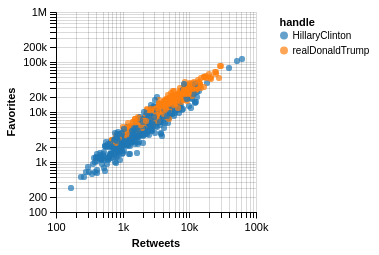

In [23]:
# YOUR CODE HERE
alt.Chart(subset).mark_point(filled=True).encode(
    x=alt.X('retweet_count', scale=alt.Scale(type='log'), title='Retweets'),
    y=alt.Y('favorite_count', scale=alt.Scale(type='log'), title='Favorites'),
    color=alt.Color('handle'),
)

Create a line chart to show  the average `favorite_count` for each candidate over time. Use a time unit of years+months and encode the candidate as color:

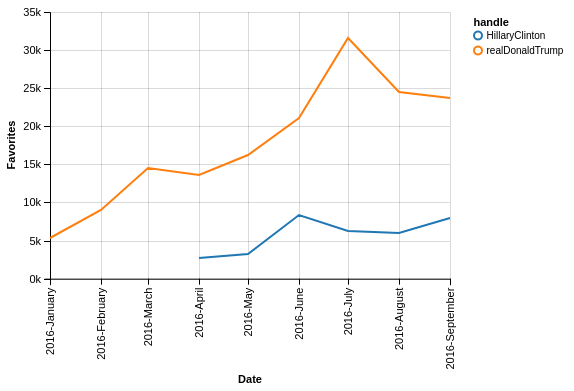

In [24]:
# YOUR CODE HERE
alt.Chart(subset).mark_line().encode(
    x=alt.X('time:T', timeUnit='yearmonth', title='Date'),
    y=alt.Y(field='favorite_count', aggregate='average', title='Favorites'),
    color=alt.Color('handle')
)

## Word counting

Create a new `DataFrame` named `counts_df` that has just the `handle` and `text` columns.

In [25]:
counts_df=data.loc[:,['handle','text']]

In [26]:
assert list(counts_df.columns)==['handle','text']
assert len(counts_df)==6444

Now run a word count on all of Trump's tweets using the `counts_df` `DataFrame`. Save the resulting word count `dict` in a variable named `trump_counts`:

In [27]:
trump_counts = {}
for tweet in counts_df.loc[counts_df.handle == 'realDonaldTrump', 'text']:
    count_words(yield_words(tweet), trump_counts)

In [28]:
assert type(trump_counts)==dict
assert abs(len(trump_counts)-6316) < 50

Do the same for Clinton's tweets, saving the word counts in a variable named `clinton_counts`:

In [29]:
clinton_counts = {}
for tweet in counts_df.loc[counts_df.handle == 'HillaryClinton', 'text']:
    count_words(yield_words(tweet), clinton_counts)

In [30]:
assert type(clinton_counts)==dict
assert abs(len(clinton_counts)-6039) < 50

## Counts as DataFrames

Let's convert the word count `dict`s to `DataFrame`s. Create two `DataFrames`, one for Trump (`trump_df`) and one for Clinton (`clinton_df`). In each `DataFrame` put the words in the first column and the `count` in the second. First create the `DataFrame` for Trump. Sort the rows by count with the largest count at the top:

In [31]:
trump_df = pd.DataFrame(data=list(trump_counts.items()), columns=['word', 'count'])
trump_df.sort_values('count', ascending=False, inplace=True)

In [32]:
trump_df.head()

,word,count
73,i,887
56,thank,522
49,great,466
43,trump,388
25,hillary,363


In [33]:
len(trump_df)

6314

In [34]:
assert list(trump_df.columns)==['word', 'count']
assert trump_df.word.dtype.name=='object'
assert trump_df['count'].dtype.name=='int64'
assert trump_df.iloc[0,1]==887
assert trump_df.iloc[2,0]=='great'

Now create the `DataFrame` for Clinton, sorting the rows in the same manner:

In [35]:
# YOUR CODE HERE
clinton_df = pd.DataFrame(data=list(clinton_counts.items()), columns=['word', 'count'])
clinton_df.sort_values('count', ascending=False, inplace=True)

In [36]:
clinton_df.head()

,word,count
11,trump,916
27,'s,808
156,hillary,454
18,i,437
79,we,433


In [37]:
len(clinton_df)

6038

In [38]:
assert list(clinton_df.columns)==['word', 'count']
assert clinton_df.word.dtype.name=='object'
assert clinton_df['count'].dtype.name=='int64'
assert clinton_df.iloc[0,1]==916
assert clinton_df.iloc[0,0]=='trump'

## Visualizing counts

Use the `trump_df` `DataFrame` to visualize the counts of the top 20 words (use `iloc` to extract the top 20 words), with:

* 'count` for x;
* `word` for y; and
* Bar marks

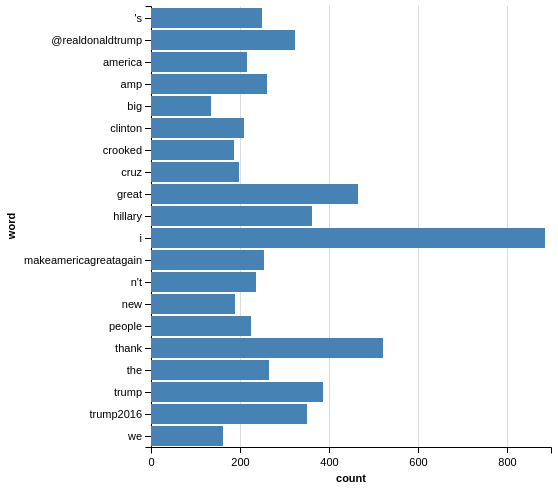

In [39]:
# YOUR CODE HERE
alt.Chart(trump_df.head(20)).mark_bar().encode(
    x=alt.X('count'),
    y=alt.Y('word')
)

Use the `clinton_df` `DataFrame` to visualize the counts of the top 20 words (use `iloc` to extract the top 20 words), with::

* 'count` for x;
* `word` for y; and
* Bar marks

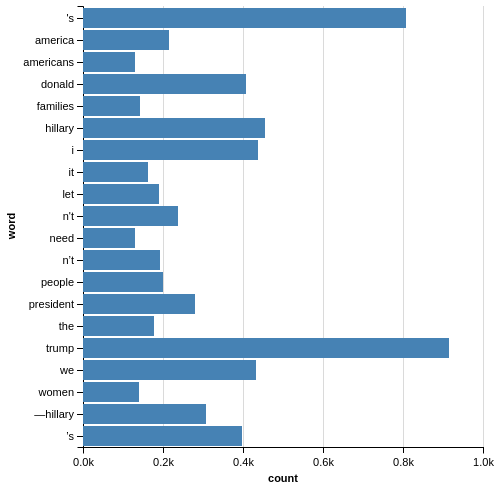

In [40]:
alt.Chart(clinton_df.head(20)).mark_bar().encode(
    x=alt.X('count'),
    y=alt.Y('word')
)